<a href="https://colab.research.google.com/github/cavadmanafov/cnn/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-27 20:15:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   207MB/s    in 0.5s    

2023-01-27 20:15:12 (207 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



# New Section

In [ ]:
print("Salam")

Salam


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls test

ls: cannot access 'test': No such file or directory


In [ ]:
import os
num_stake_images_train = len(os.listdir("pizza_steak/train/steak"))
num_stake_images_train

750

In [ ]:
!ls -la pizza_st

ls: cannot access 'pizza_st': No such file or directory


In [ ]:
import pathlib
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names) 

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img 

['2534774.jpg']
Image shape: (512, 512, 3)


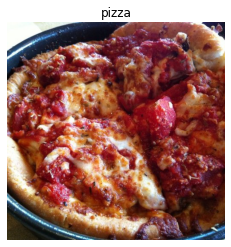

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [ ]:
import tensorflow as tf 
img = tf.constant(img)

In [ ]:
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 22,  19,  30],
        [ 21,  20,  28],
        [ 22,  21,  27]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 23,  21,  34],
        [ 21,  21,  31],
        [ 22,  22,  30]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 22,  21,  37],
        [ 19,  21,  34],
        [ 18,  22,  33]],

       ...,

       [[ 63,  56,  27],
        [ 63,  56,  28],
        [ 62,  55,  27],
        ...,
        [ 79, 104, 111],
        [119, 144, 151],
        [139, 164, 169]],

       [[ 64,  57,  28],
        [ 65,  58,  30],
        [ 63,  56,  28],
        ...,
        [130, 154, 154],
        [184, 209, 206],
        [195, 220, 217]],

       [[ 60,  53,  24],
        [ 63,  56,  28],
        [ 64,  57,  29],
        ...,
        [165, 190, 18

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#Build a CNN model 

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile our CNN

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#Fit the model 

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 110s 2s/step - loss: 0.5603 - accuracy: 0.6987 - val_loss: 0.4784 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 108s 2s/step - loss: 0.4390 - accuracy: 0.8087 - val_loss: 0.3410 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 0.3730 - accuracy: 0.8293 - val_loss: 0.3131 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 107s 2s/step - loss: 0.3795 - accuracy: 0.8353 - val_loss: 0.3071 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.3295 - accuracy: 0.8620 - val_loss: 0.3036 - val_accuracy: 0.8960


# New Section

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 22,  19,  30],
        [ 21,  20,  28],
        [ 22,  21,  27]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 23,  21,  34],
        [ 21,  21,  31],
        [ 22,  22,  30]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [ 22,  21,  37],
        [ 19,  21,  34],
        [ 18,  22,  33]],

       ...,

       [[ 63,  56,  27],
        [ 63,  56,  28],
        [ 62,  55,  27],
        ...,
        [ 79, 104, 111],
        [119, 144, 151],
        [139, 164, 169]],

       [[ 64,  57,  28],
        [ 65,  58,  30],
        [ 63,  56,  28],
        ...,
        [130, 154, 154],
        [184, 209, 206],
        [195, 220, 217]],

       [[ 60,  53,  24],
        [ 63,  56,  28],
        [ 64,  57,  29],
        ...,
        [165, 190, 18

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 215ms/step - loss: 0.7061 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 267ms/step - loss: 2.7249 - accuracy: 0.6100 - val_loss: 0.7985 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 1.0208 - accuracy: 0.6927 - val_loss: 0.7503 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 13s 266ms/step - loss: 0.7278 - accuracy: 0.7300 - val_loss: 0.7920 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4799 - accuracy: 0.7807 - val_loss: 0.5302 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 12s 266ms/step - loss: 0.4312 - accuracy: 0.8040 - val_loss: 0.5997 - val_accuracy: 0.7360


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['3241894.jpg']
Image shape: (512, 512, 3)
['809024.jpg']
Image shape: (384, 512, 3)


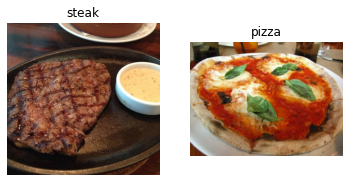

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir, target_size = (224, 224), class_mode = "binary", batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir, target_size = (224, 224), class_mode = "binary", batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[8].shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
    kernel_size = 3,
    strides = 1,
    padding = "valid",
    activation = "relu",
    input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)



In [ ]:
history_4 = model_4.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 125s 3s/step - loss: 1.6007 - accuracy: 0.6160 - val_loss: 0.5122 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 129s 3s/step - loss: 0.4879 - accuracy: 0.7853 - val_loss: 0.4808 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 130s 3s/step - loss: 0.3899 - accuracy: 0.8367 - val_loss: 0.3712 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 127s 3s/step - loss: 0.2631 - accuracy: 0.8993 - val_loss: 0.3479 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 126s 3s/step - loss: 0.1114 - accuracy: 0.9660 - val_loss: 0.8580 - val_accuracy: 0.6840


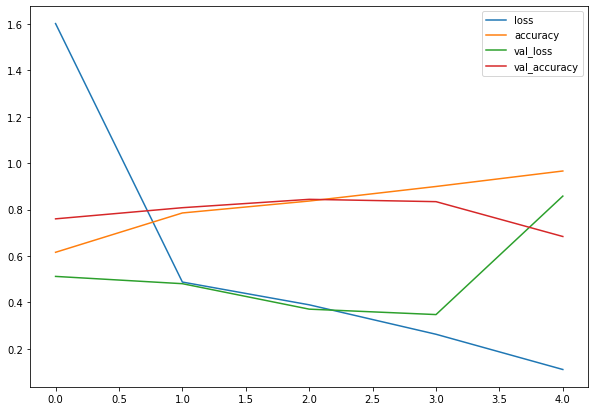

In [ ]:
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
import matplotlib.pyplot as plt 
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "validation_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()  

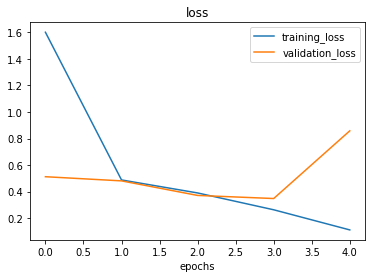

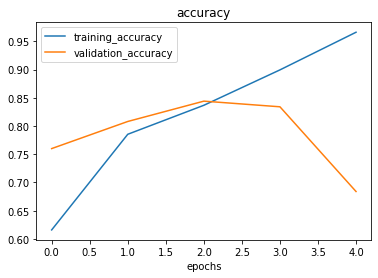

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")]
)

In [ ]:
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [ ]:
history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data= test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.6459 - accuracy: 0.6267 - val_loss: 0.4682 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.4655 - accuracy: 0.7893 - val_loss: 0.3795 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.4369 - accuracy: 0.8107 - val_loss: 0.3718 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 54s 1s/step - loss: 0.4246 - accuracy: 0.8187 - val_loss: 0.4107 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 54s 1s/step - loss: 0.4143 - accuracy: 0.8160 - val_loss: 0.3519 - val_accuracy: 0.8500


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 7s 413ms/step - loss: 0.3519 - accuracy: 0.8500


[0.35187026858329773, 0.8500000238418579]

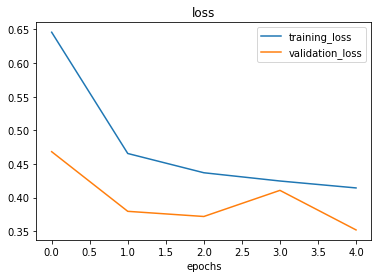

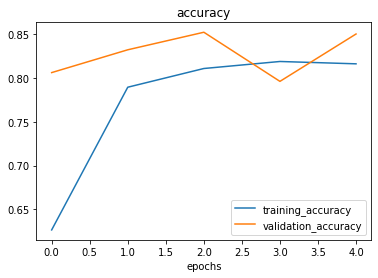

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                        rotation_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        width_shift_range = 0.2, 
                                        height_shift_range = 0.3,
                                        horizontal_flip = True)
#without data augmentation 
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)
IMG_SIZE = (224, 224)

print("Non augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number 14


(-0.5, 223.5, 223.5, -0.5)

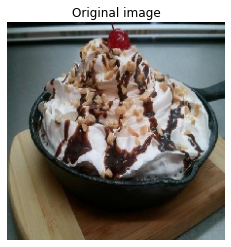

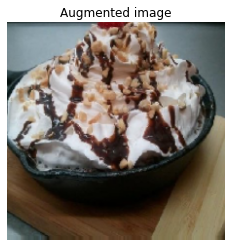

In [ ]:
import random
random_number = random.randint(0, 32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.title(f"Augmented image")
plt.imshow(augmented_images[random_number])
plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_6 = Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_6 = model_6.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 68s 1s/step - loss: 0.6996 - accuracy: 0.4727 - val_loss: 0.6834 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.7221 - accuracy: 0.6047 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 66s 1s/step - loss: 0.7013 - accuracy: 0.5027 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.6824 - accuracy: 0.5040 - val_loss: 0.6879 - val_accuracy: 0.5680
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.6896 - accuracy: 0.5560 - val_loss: 0.6617 - val_accuracy: 0.5080


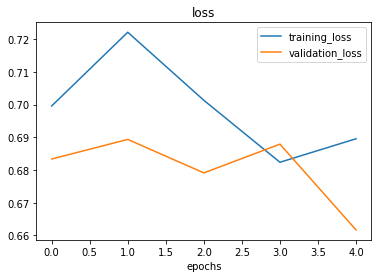

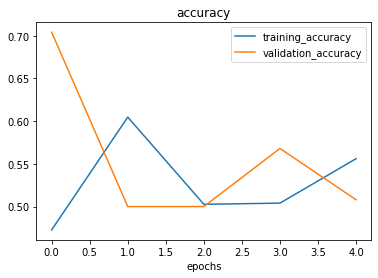

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print("Augmented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = True
                                                                   )

Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_6 = Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_6 = model_6.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.6898 - accuracy: 0.4947 - val_loss: 0.6660 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.6613 - accuracy: 0.5433 - val_loss: 0.6255 - val_accuracy: 0.5780
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.5839 - accuracy: 0.6953 - val_loss: 0.3927 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.5097 - accuracy: 0.7360 - val_loss: 0.4047 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.4878 - accuracy: 0.7733 - val_loss: 0.3439 - val_accuracy: 0.8520


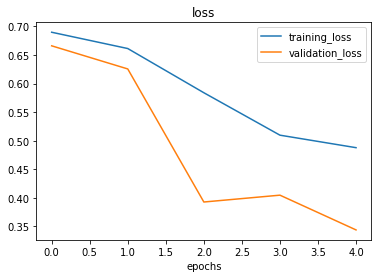

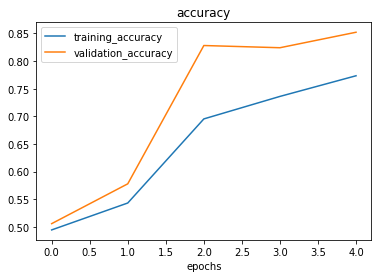

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print("bezdim")

bezdim
